In [9]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms 
from torch import nn
from torch.utils.data import DataLoader


In [10]:
data_transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
])

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=False,
    transform=data_transform,
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=False,
    transform=data_transform,
)

In [11]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(dataset=training_data,
    batch_size=batch_size,
    shuffle=True)
test_dataloader = DataLoader(dataset=test_data, 
    batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 32, 32])
Shape of y: torch.Size([64]) torch.int64


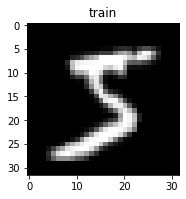

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from torchvision.transforms.functional import to_pil_image

for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(to_pil_image(inputs[0]), cmap='gray')
    plt.title('train')
    break

In [4]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [6]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [7]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303670  [    0/60000]
loss: 2.301056  [ 6400/60000]
loss: 2.301539  [12800/60000]
loss: 2.290112  [19200/60000]
loss: 2.287209  [25600/60000]
loss: 2.286199  [32000/60000]
loss: 2.266811  [38400/60000]
loss: 2.288933  [44800/60000]
loss: 2.266318  [51200/60000]
loss: 2.252344  [57600/60000]
Test Error: 
 Accuracy: 46.7%, Avg loss: 2.256902 

Epoch 2
-------------------------------
loss: 2.255552  [    0/60000]
loss: 2.252667  [ 6400/60000]
loss: 2.261606  [12800/60000]
loss: 2.225046  [19200/60000]
loss: 2.235263  [25600/60000]
loss: 2.234912  [32000/60000]
loss: 2.206037  [38400/60000]
loss: 2.241807  [44800/60000]
loss: 2.203204  [51200/60000]
loss: 2.183715  [57600/60000]
Test Error: 
 Accuracy: 61.2%, Avg loss: 2.190518 

Epoch 3
-------------------------------
loss: 2.188668  [    0/60000]
loss: 2.181847  [ 6400/60000]
loss: 2.201895  [12800/60000]
loss: 2.131361  [19200/60000]
loss: 2.156991  [25600/60000]
loss: 2.154327  [32000/600